In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('../../Datasets/Google_Stock_price/Google_Stock_Price_Train.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df

In [4]:
df_train['Close'].value_counts()

718.81    2
759.69    2
573.7     2
772.15    2
532.34    2
         ..
582.06    1
514.94    1
548.78    1
533.85    1
614.66    1
Name: Close, Length: 1241, dtype: int64

In [5]:
df_train['Close']=df_train['Close'].str.replace(',',"").astype(float)

In [6]:
df_train['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [7]:
df_train['Close']

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [8]:
X = df_train[['Open','High','Low','Close']]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602]])

In [11]:
X.shape

(1258, 4)

In [12]:
rows=[]
for i in range(1198):
    rows.append(X[i:i+61,0:4])#Slicing i=0 to 60 and 0 for first column
X_train=np.array(rows)
X_train.shape

(1198, 61, 4)

In [13]:
y_train = X_train[:,-1]
X_train = X_train[:,:-1]

In [14]:
X_train.shape

(1198, 60, 4)

In [15]:
y_train.shape

(1198, 4)

In [16]:
# Model Building
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(60,4)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(4))

model.compile(loss='mean_squared_error')

In [18]:
model.fit(X_train,y_train, epochs=40, batch_size=32)

Epoch 1/40
38/38 [==============================] - 23s 255ms/step - loss: 0.0401
Epoch 2/40
38/38 [==============================] - 9s 250ms/step - loss: 0.0154
Epoch 3/40
38/38 [==============================] - 9s 238ms/step - loss: 0.0117
Epoch 4/40
38/38 [==============================] - 9s 236ms/step - loss: 0.0111
Epoch 5/40
38/38 [==============================] - 9s 231ms/step - loss: 0.0084
Epoch 6/40
38/38 [==============================] - 9s 239ms/step - loss: 0.0071
Epoch 7/40
38/38 [==============================] - 8s 223ms/step - loss: 0.0069
Epoch 8/40
38/38 [==============================] - 9s 229ms/step - loss: 0.0057
Epoch 9/40
38/38 [==============================] - 9s 236ms/step - loss: 0.0054
Epoch 10/40
38/38 [==============================] - 9s 236ms/step - loss: 0.0050
Epoch 11/40
38/38 [==============================] - 9s 232ms/step - loss: 0.0041
Epoch 12/40
38/38 [==============================] - 8s 212ms/step - loss: 0.0039
Epoch 13/40
38/38 [=====

In [19]:
df_test=pd.read_csv('../../Datasets/Google_Stock_price/Google_Stock_Price_Test.csv')
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


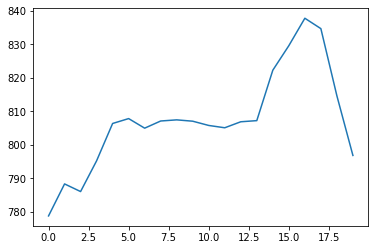

In [20]:
plt.plot(df_test['Open'])

In [21]:
temp = scaler.transform(df_test[['Open','High','Low','Close']])
temp.shape

(20, 4)

In [22]:
temp1 = np.vstack([X[-60:], temp])
temp1.shape

(80, 4)

In [23]:
rows = []
for i in range(20):
    rows.append(temp1[i:60+i,0:4])
X_test = np.array(rows)
X_test.shape

(20, 60, 4)

In [24]:
yp=model.predict(X_test)

In [25]:
yp=scaler.inverse_transform(yp)

In [26]:
yp

array([[775.89233, 785.06305, 769.1079 , 783.46704],
       [788.93726, 798.24963, 783.6989 , 796.88855],
       [782.7044 , 791.0668 , 776.7132 , 790.1578 ],
       [788.97095, 797.4817 , 783.63025, 795.8196 ],
       [796.46436, 804.2633 , 791.9058 , 802.89514],
       [794.1988 , 801.45026, 789.21643, 799.82367],
       [794.4176 , 801.8436 , 789.3611 , 799.7997 ],
       [795.97736, 803.4268 , 791.06494, 801.60004],
       [793.35986, 800.83264, 788.0956 , 799.22577],
       [797.26294, 804.89795, 792.43396, 803.37604],
       [790.9398 , 798.4953 , 785.3238 , 797.3146 ],
       [794.63403, 802.59937, 789.4458 , 801.3417 ],
       [791.12103, 798.9286 , 785.5069 , 798.1427 ],
       [793.683  , 801.6937 , 788.3489 , 800.82025],
       [803.16394, 810.7792 , 798.927  , 810.08936],
       [802.97174, 809.8962 , 798.60004, 809.08734],
       [812.9249 , 819.6845 , 809.70624, 818.02466],
       [806.5617 , 812.81384, 802.4384 , 811.28076],
       [805.8618 , 812.69257, 801.57904, 810.8

In [27]:
A = df_test[['Open','High','Low','Close']]

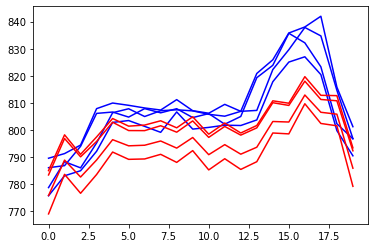

In [28]:
plt.plot(A, c='blue')
plt.plot(yp, c='red')